In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') # Look Pretty

In [68]:
# If you'd like to try this lab with PCA instead of Isomap,
# as the dimensionality reduction technique:
Test_PCA = True

In [69]:
def plotDecisionBoundary(model, X, y):
    print("Plotting...")
  
    fig = plt.figure()
    ax = fig.add_subplot(111)
  
    padding = 0.1
    resolution = 0.1
  
    #(2 for benign, 4 for malignant)
    colors = {2:'royalblue',4:'lightsalmon'} 
  
    
    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding
  
    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    import numpy as np
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
  
    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
  
    # Plot the contour map
    plt.contourf(xx, yy, Z, cmap=plt.cm.seismic)
    plt.axis('tight')
  
    # Plot your testing points as well...
    for label in np.unique(y):
      indices = np.where(y == label)
      plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)
  
    p = model.get_params()
    plt.title('K = ' + str(p['n_neighbors']))
    plt.show()

In [70]:
# 
# TODO: Load in the dataset, identify nans, and set proper headers.
# Be sure to verify the rows line up by looking at the file in a text editor.
#
cols = ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv('Datasets/breast-cancer-wisconsin.data', names=cols)
df.head()

,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [71]:
# Check types of DataFrame and convert to proper datatype
print(df.dtypes)
df['nuclei'] = pd.to_numeric(df['nuclei'], errors='coerce')
df = df.fillna(df.mean())

sample         int64
thickness      int64
size           int64
shape          int64
adhesion       int64
epithelial     int64
nuclei        object
chromatin      int64
nucleoli       int64
mitoses        int64
status         int64
dtype: object


In [72]:
# 
# TODO: Copy out the status column into a slice, then drop it from the main
# dataframe. You can also drop the sample column, since that doesn't provide
# us with any machine learning power.
#
y = df['status']
X = df.drop(['sample', 'status'], axis=1)
X.head()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


Computing 2D Principle Components
K = 8; Accuracy = 0.957142857143
Plotting...


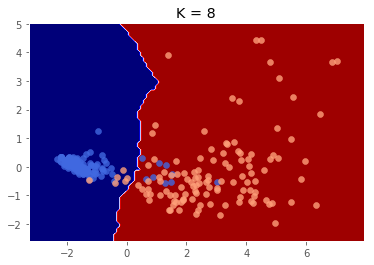

In [88]:
def doKNNFeatureScaling(feature_scaling, X, K, knn_weight):
    print('do KNN with feature scalling: ', feature_scaling)
    #
    # TODO: Do train_test_split. Use the same variable names as on the EdX platform in
    # the reading material, but set the random_state=7 for reproduceability, and keep
    # the test_size at 0.5 (50%).
    #
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

    #
    # PCA and Isomap are your new best friends
    model = None
    if Test_PCA:
        print("Computing 2D Principle Components")
        #
        # TODO: Implement PCA here. save your model into the variable 'model'.
        # You should reduce down to two dimensions.
        #
        from sklearn.decomposition import PCA
        model = PCA(n_components=2)
    else:
        print("Computing 2D Isomap Manifold")
        #
        # TODO: Implement Isomap here. save your model into the variable 'model'
        # Experiment with K values from 5-10.
        # You should reduce down to two dimensions.
        #
        from sklearn.manifold import Isomap
        model = Isomap(n_components=2, n_neighbors=8)

    #
    # TODO: Train your model against data_train, then transform both
    # data_train and data_test using your model. You can save the results right
    # back into the variables themselves.
    #
    model.fit(X_train_scaled)
    X_train = model.transform(X_train)
    X_test = model.transform(X_test)

    # 
    # TODO: Implement and train KNeighborsClassifier on your projected 2D
    # training data here. You can use any K value from 1 - 15, so play around
    # with it and see what results you can come up. Your goal is to find a
    # good balance where you aren't too specific (low-K), nor are you too
    # general (high-K). You should also experiment with how changing the weights
    # parameter affects the results.
    #

    #
    # INFO: Be sure to always keep the domain of the problem in mind! It's
    # WAY more important to errantly classify a benign tumor as malignant,
    # and have it removed, than to incorrectly leave a malignant tumor, believing
    # it to be benign, and then having the patient progress in cancer. Since the UDF
    # weights don't give you any class information, the only way to introduce this
    # data into SKLearn's KNN Classifier is by "baking" it into your data. For
    # example, randomly reducing the ratio of benign samples compared to malignant
    # samples from the training set.



    #
    # TODO: Calculate + Print the accuracy of the testing set
    #
    # .. your code here ..

    def doKNN(X_train, y_train, X_test, y_test, K, weight='uniform'):
        from sklearn.neighbors import KNeighborsClassifier
        knmodel = KNeighborsClassifier(n_neighbors=K)
        knmodel.fit(X_train, y_train)
        #print('K = ' + str(K) + '; Accuracy = ' + str(knmodel.score(X_test, y_test)))
        #plotDecisionBoundary(knmodel, X_test, y_test)
        return knmodel.score(X_test, y_test)

    return doKNN(X_train, y_train, X_test, y_test, K, knn_weight)

In [102]:
#
# TODO: Experiment with the basic SKLearn preprocessing scalers. We know that
# the features consist of different units mixed in together, so it might be
# reasonable to assume feature scaling is necessary. Print out a description
# of the dataset, post transformation.
#

# Do feature scalling on X
from sklearn import preprocessing
knn_weight = 'uniform'
for K in range(1,16):
    accuracies = []
    for i in range(1,6):
        if i==1: 
            X = preprocessing.StandardScaler().fit_transform(X)
            accuracies.append(doKNNFeatureScaling('StandardScaler', X, K, knn_weight))
        elif i==2: 
            X = preprocessing.MinMaxScaler().fit_transform(X)
            accuracies.append(doKNNFeatureScaling('MinMaxScaler', X, K, knn_weight))
        elif i==3: 
            X = preprocessing.MaxAbsScaler().fit_transform(X)
            accuracies.append(doKNNFeatureScaling('MaxAbsScaler', X, K, knn_weight))
        elif i==4:
            X = preprocessing.Normalizer().fit_transform(X)
            accuracies.append(doKNNFeatureScaling('Normalizer', X, K, knn_weight))
        else: 
            # do nothing
            accuracies.append(doKNNFeatureScaling('Do nothing', X, K, knn_weight))
    print('\nK = '+str(K)+', Accuracy max at: '+str(accuracies.index(max(accuracies)))+' - '+str(max(accuracies)))

do KNN with feature scalling:  StandardScaler
Computing 2D Principle Components
do KNN with feature scalling:  MinMaxScaler
Computing 2D Principle Components
do KNN with feature scalling:  MaxAbsScaler
Computing 2D Principle Components
do KNN with feature scalling:  Normalizer
Computing 2D Principle Components
do KNN with feature scalling:  Do nothing
Computing 2D Principle Components

K = 1, Accuracy max at: 3 - 0.84
do KNN with feature scalling:  StandardScaler
Computing 2D Principle Components
do KNN with feature scalling:  MinMaxScaler
Computing 2D Principle Components
do KNN with feature scalling:  MaxAbsScaler
Computing 2D Principle Components
do KNN with feature scalling:  Normalizer
Computing 2D Principle Components
do KNN with feature scalling:  Do nothing
Computing 2D Principle Components

K = 2, Accuracy max at: 1 - 0.84
do KNN with feature scalling:  StandardScaler
Computing 2D Principle Components
do KNN with feature scalling:  MinMaxScaler
Computing 2D Principle Component